In [19]:
from kan import *
import torch
import matplotlib.pyplot as plt
from torch import autograd
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [20]:
# create a KAN: 5D inputs, 0 output hidden neurons, 1 multiplication hidden neuron, 1D output. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[1, [0, 1]], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [21]:
 # create dataset f(x,y) = x^n * exp(alpha*x)
f = lambda x: torch.sin(x[:,[0]]) * torch.cos(x[:,[0]])
dataset = create_dataset(f, n_var=1)

# create dataset g(x,y) = sin(x)^2 * cos(x)
# g = lambda x: torch.sin(x[:,[0]])**2 * torch.cos(x[:,[1]])

In [22]:
print(dataset)

{'train_input': tensor([[-7.4868e-03],
        [ 5.3644e-01],
        [-8.2305e-01],
        [-7.3594e-01],
        [-3.8515e-01],
        [ 2.6816e-01],
        [-1.9813e-02],
        [ 7.9289e-01],
        [-8.8744e-02],
        [ 2.6461e-01],
        [-3.0221e-01],
        [-1.9657e-01],
        [-9.5535e-01],
        [-6.6228e-01],
        [-4.1222e-01],
        [ 3.7044e-02],
        [ 3.9534e-01],
        [ 6.0002e-01],
        [-6.7794e-01],
        [-4.3546e-01],
        [ 3.6322e-01],
        [ 8.3039e-01],
        [-2.0580e-01],
        [ 7.4831e-01],
        [-1.6118e-01],
        [ 1.0581e-01],
        [ 9.0548e-01],
        [-9.2767e-01],
        [-6.2954e-01],
        [-2.5317e-01],
        [-3.8980e-01],
        [ 8.6400e-01],
        [-6.4818e-01],
        [-4.6033e-01],
        [-6.9864e-01],
        [-9.3656e-01],
        [-5.8374e-01],
        [ 8.5960e-01],
        [ 4.4622e-01],
        [ 4.8467e-01],
        [ 5.2592e-02],
        [-5.1268e-01],
        [ 1.6918e-

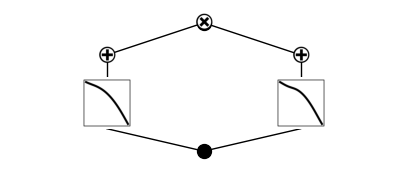

In [23]:
dataset['train_input'].shape, dataset['train_label'].shape


model(dataset['train_input'])
model.plot(beta=100)

Input shape: torch.Size([10000, 2])
Output shape: torch.Size([10000, 1])

Input statistics:
theta range: [0.017, 3.116]
phi range: [0.000, 6.281]

Output statistics:
Y_1^1 range: [-0.345, 0.345]
Y_1^1 mean: 0.002
Y_1^1 std: 0.200


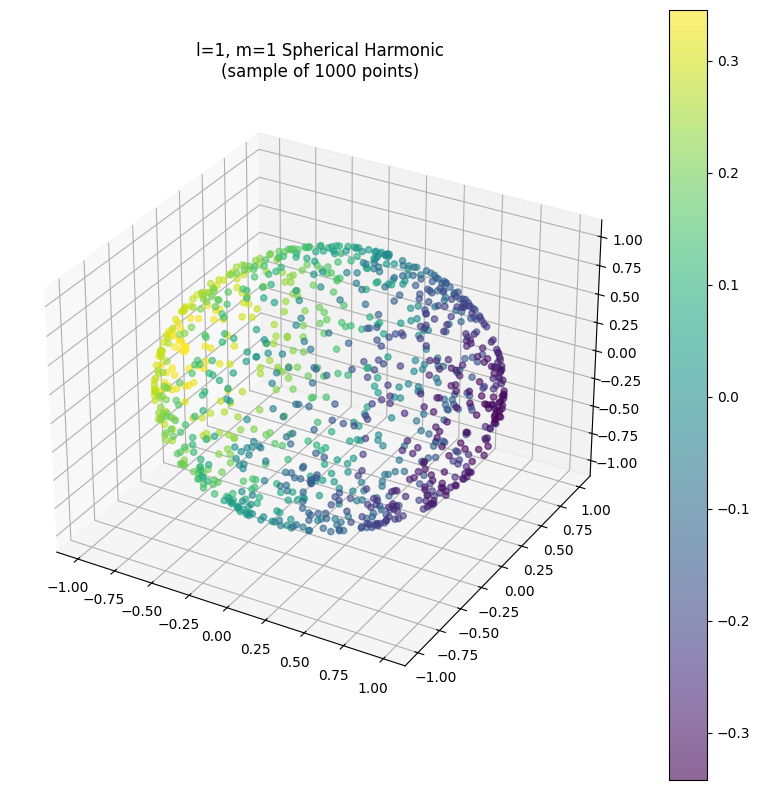

In [42]:
import numpy as np
import torch

def generate_l1m1_dataset(n_points=10000, seed=42):
    """
    Generate test dataset for l=1, m=1 spherical harmonic.
    Returns:
        inputs: torch tensor of shape (n_points, 2) containing (theta, phi)
        outputs: torch tensor of shape (n_points, 1) containing Y_1^1 values
    """
    # Set random seed for reproducibility
    np.random.seed(seed)
    
    # Generate random points on a sphere using the uniform spherical distribution
    # Generate phi uniformly between 0 and 2π
    phi = np.random.uniform(0, 2*np.pi, n_points)
    
    # Generate cos(theta) uniformly between -1 and 1
    cos_theta = np.random.uniform(-1, 1, n_points)
    theta = np.arccos(cos_theta)
    
    # Calculate the analytical value for Y_1^1
    # Y_1^1 = -sqrt(3/8π) * sin(θ) * exp(iφ)
    # For the real spherical harmonic, we take the real part:
    # Y_1^1 = -sqrt(3/8π) * sin(θ) * cos(φ)
    sin_theta = np.sin(theta)
    normalization = -np.sqrt(3/(8*np.pi))
    Y_1_1 = normalization * sin_theta * np.cos(phi)
    
    # Stack theta and phi as inputs
    inputs = np.stack([theta, phi], axis=1)
    
    # Convert to torch tensors with float32 precision
    inputs = torch.tensor(inputs, dtype=torch.float32)
    outputs = torch.tensor(Y_1_1, dtype=torch.float32).reshape(-1, 1)
    
    # Verify the data
    print(f"Input shape: {inputs.shape}")
    print(f"Output shape: {outputs.shape}")
    print("\nInput statistics:")
    print(f"theta range: [{inputs[:, 0].min():.3f}, {inputs[:, 0].max():.3f}]")
    print(f"phi range: [{inputs[:, 1].min():.3f}, {inputs[:, 1].max():.3f}]")
    print("\nOutput statistics:")
    print(f"Y_1^1 range: [{outputs.min():.3f}, {outputs.max():.3f}]")
    print(f"Y_1^1 mean: {outputs.mean():.3f}")
    print(f"Y_1^1 std: {outputs.std():.3f}")
    
    return inputs, outputs

# Generate the dataset
X, y = generate_l1m1_dataset(n_points=10000)

# Optional: Save the dataset
torch.save({
    'inputs': X,
    'outputs': y
}, 'l1m1_dataset.pt')

# Plot a sample of points to verify the spherical harmonic pattern
import matplotlib.pyplot as plt

def plot_sample_points(X, y, n_sample=1000):
    # Convert spherical to Cartesian coordinates
    theta, phi = X[:n_sample, 0], X[:n_sample, 1]
    x = np.sin(theta) * np.cos(phi)
    y_coord = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(x, y_coord, z, c=y[:n_sample], 
                        cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    ax.set_title('l=1, m=1 Spherical Harmonic\n(sample of 1000 points)')
    plt.show()

plot_sample_points(X, y)

Input shape: torch.Size([10000, 2])
Output shape: torch.Size([10000, 1])

Input statistics:
theta range: [0.017, 3.116]
phi range: [0.000, 6.281]

Output statistics:
Y_1^1 range: [-0.345, 0.345]
Y_1^1 mean: 0.002
Y_1^1 std: 0.200


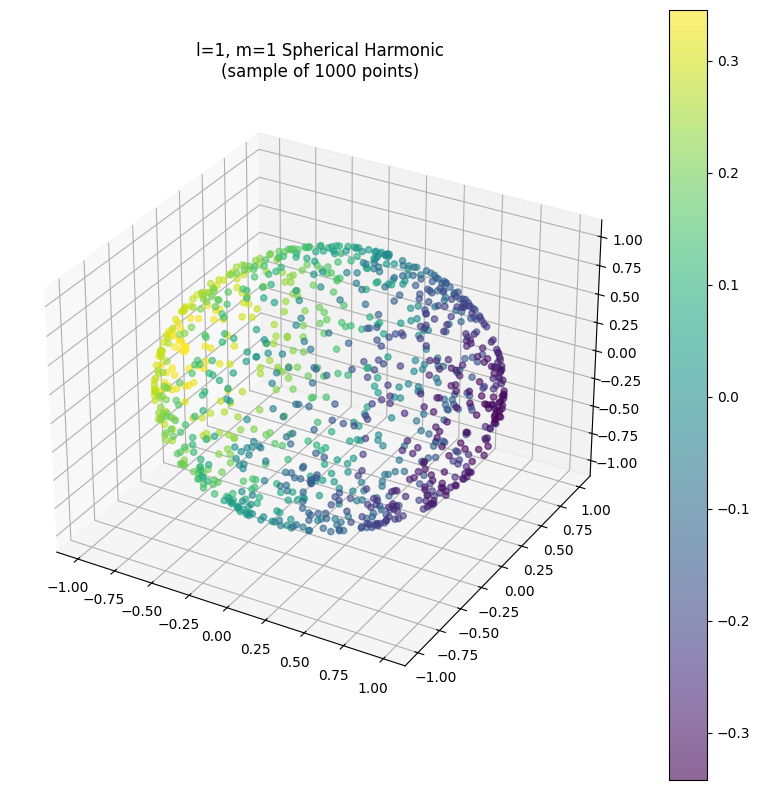

In [41]:
import numpy as np
import torch

def generate_l1m1_dataset(n_points=10000, seed=42):
    """
    Generate test dataset for l=1, m=1 spherical harmonic.
    Returns:
        inputs: torch tensor of shape (n_points, 2) containing (theta, phi)
        outputs: torch tensor of shape (n_points, 1) containing Y_1^1 values
    """
    # Set random seed for reproducibility
    np.random.seed(seed)
    
    # Generate random points on a sphere using the uniform spherical distribution
    # Generate phi uniformly between 0 and 2π
    phi = np.random.uniform(0, 2*np.pi, n_points)
    
    # Generate cos(theta) uniformly between -1 and 1
    cos_theta = np.random.uniform(-1, 1, n_points)
    theta = np.arccos(cos_theta)
    
    # Calculate the analytical value for Y_1^1
    # Y_1^1 = -sqrt(3/8π) * sin(θ) * exp(iφ)
    # For the real spherical harmonic, we take the real part:
    # Y_1^1 = -sqrt(3/8π) * sin(θ) * cos(φ)
    sin_theta = np.sin(theta)
    normalization = -np.sqrt(3/(8*np.pi))
    Y_1_1 = normalization * sin_theta * np.cos(phi)
    
    # Stack theta and phi as inputs
    inputs = np.stack([theta, phi], axis=1)
    
    # Convert to torch tensors with float32 precision
    inputs = torch.tensor(inputs, dtype=torch.float32)
    outputs = torch.tensor(Y_1_1, dtype=torch.float32).reshape(-1, 1)
    
    # Verify the data
    print(f"Input shape: {inputs.shape}")
    print(f"Output shape: {outputs.shape}")
    print("\nInput statistics:")
    print(f"theta range: [{inputs[:, 0].min():.3f}, {inputs[:, 0].max():.3f}]")
    print(f"phi range: [{inputs[:, 1].min():.3f}, {inputs[:, 1].max():.3f}]")
    print("\nOutput statistics:")
    print(f"Y_1^1 range: [{outputs.min():.3f}, {outputs.max():.3f}]")
    print(f"Y_1^1 mean: {outputs.mean():.3f}")
    print(f"Y_1^1 std: {outputs.std():.3f}")
    
    return inputs, outputs

# Generate the dataset
X, y = generate_l1m1_dataset(n_points=10000)

# Optional: Save the dataset
torch.save({
    'inputs': X,
    'outputs': y
}, 'l1m1_dataset.pt')

# Plot a sample of points to verify the spherical harmonic pattern
import matplotlib.pyplot as plt

def plot_sample_points(X, y, n_sample=1000):
    # Convert spherical to Cartesian coordinates
    theta, phi = X[:n_sample, 0], X[:n_sample, 1]
    x = np.sin(theta) * np.cos(phi)
    y_coord = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(x, y_coord, z, c=y[:n_sample], 
                        cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    ax.set_title('l=1, m=1 Spherical Harmonic\n(sample of 1000 points)')
    plt.show()

plot_sample_points(X, y)

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import *
from scipy.special import lpmv
class SphericalHarmonicKANLayer(nn.Module):
    def init(self, inputdim, outdim, max_l=4, addbias=True):
        super(SphericalHarmonicKANLayer, self).init()
        self.max_l = max_l
        self.addbias = addbias
        self.inputdim = inputdim
        self.outdim = outdim

        # Calculate total number of coefficients needed
        # For each l, m goes from -l to l, giving 2l+1 components
        self.n_coeffs = sum([(2*l + 1) for l in range(max_l + 1)])

        # Initialize coefficients for real spherical harmonics
        # One set for each input-output dimension pair
        self.sh_coeffs = torch.nn.Parameter(
            torch.randn(outdim, inputdim, self.n_coeffs) / 
            np.sqrt(inputdim * self.n_coeffs)
        )

        if self.addbias:
            self.bias = torch.nn.Parameter(torch.zeros(1, outdim))
    def compute_real_spherical_harmonics(self, theta, phi):
        """Compute real spherical harmonics up to max_l"""
        outputs = []
        for l in range(self.max_l + 1):
            for m in range(-l, l + 1):
                # Convert spherical coordinates to cos(theta)
                x = torch.cos(theta)

                # Compute associated Legendre polynomial
                # Note: This is a simplification - you might want to use a proper
                # implementation of associated Legendre polynomials
                legendre = torch.from_numpy(lpmv(abs(m), l, x.cpu().numpy())).to(x.device)

                if m > 0:
                    # Real spherical harmonic for m > 0
                    Y = legendre * torch.cos(m * phi)
                elif m < 0:
                    # Real spherical harmonic for m < 0
                    Y = legendre * torch.sin(abs(m) * phi)
                else:
                    # Real spherical harmonic for m = 0
                    Y = legendre

                # Normalization factor
                norm = np.sqrt((2*l + 1) * np.math.factorial(l - abs(m)) / 
                             (4*np.pi * np.math.factorial(l + abs(m))))
                Y = Y * norm

                outputs.append(Y)

        return torch.stack(outputs, dim=-1)
    def forward(self, x):
        xshp = x.shape
        outshape = xshp[0:-1] + (self.outdim,)
        x = torch.reshape(x, (-1, self.inputdim))

        # Convert input coordinates to spherical coordinates
        # Assuming input is in format (theta, phi) for each dimension
        theta = x[..., 0::2]  # Take even indices for theta
        phi = x[..., 1::2]    # Take odd indices for phi

        # Compute spherical harmonics for each input coordinate pair
        Y = self.compute_real_spherical_harmonics(theta, phi)

        # Combine with coefficients
        y = torch.einsum('bik,oik->bo', Y, self.sh_coeffs)

        if self.addbias:
            y += self.bias

        y = torch.reshape(y, outshape)
        return y
class SphericalHarmonic_KAN(nn.Module):
    def init(
        self,
        layers_hidden: List[int],
        max_l: int = 4,
    ) -> None:
        super().init()
        self.layers = nn.ModuleList([
            SphericalHarmonicKANLayer(
                inputdim=in_dim,
                outdim=out_dim,
                max_l=max_l,
            ) for in_dim, out_dim in zip(layers_hidden[:-1], layers_hidden[1:])
        ])
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import *

# code modified from https://github.com/GistNoesis/FourierKAN/

#This is inspired by Kolmogorov-Arnold Networks but using 1d fourier coefficients instead of splines coefficients
#It should be easier to optimize as fourier are more dense than spline (global vs local)
#Once convergence is reached you can replace the 1d function with spline approximation for faster evaluation giving almost the same result
#The other advantage of using fourier over spline is that the function are periodic, and therefore more numerically bounded
#Avoiding the issues of going out of grid

class FourierKANLayer(nn.Module):
    def __init__( self, inputdim, outdim, gridsize,addbias=True):
        super(FourierKANLayer,self).__init__()
        self.gridsize= gridsize
        self.addbias = addbias
        self.inputdim = inputdim
        self.outdim = outdim
        
        #The normalization has been chosen so that if given inputs where each coordinate is of unit variance,
        #then each coordinates of the output is of unit variance 
        #independently of the various sizes
        self.fouriercoeffs = torch.nn.Parameter(torch.randn(2,outdim,inputdim,gridsize) / 
                                             (np.sqrt(inputdim) * np.sqrt(self.gridsize) ) )
        if self.addbias:
            self.bias  = torch.nn.Parameter(torch.zeros(1,outdim))

    #x.shape ( ... , indim ) 
    #out.shape ( ..., outdim)
    def forward(self,x):
        xshp = x.shape
        outshape = xshp[0:-1]+(self.outdim,)
        x = torch.reshape(x,(-1,self.inputdim))
        #Starting at 1 because constant terms are in the bias
        k = torch.reshape(torch.arange(1,self.gridsize+1,device=x.device),(1,1,1,self.gridsize))
        xrshp = torch.reshape(x,(x.shape[0],1,x.shape[1],1))
        #This should be fused to avoid materializing memory
        c = torch.cos( k*xrshp )
        s = torch.sin( k*xrshp )
        #We compute the interpolation of the various functions defined by their fourier coefficient for each input coordinates and we sum them 
        y =  torch.sum( c*self.fouriercoeffs[0:1],(-2,-1)) 
        y += torch.sum( s*self.fouriercoeffs[1:2],(-2,-1))
        if( self.addbias):
            y += self.bias
        #End fuse
        '''
        #You can use einsum instead to reduce memory usage
        #It stills not as good as fully fused but it should help
        #einsum is usually slower though
        c = th.reshape(c,(1,x.shape[0],x.shape[1],self.gridsize))
        s = th.reshape(s,(1,x.shape[0],x.shape[1],self.gridsize))
        y2 = th.einsum( "dbik,djik->bj", th.concat([c,s],axis=0) ,self.fouriercoeffs )
        if( self.addbias):
            y2 += self.bias
        diff = th.sum((y2-y)**2)
        print("diff")
        print(diff) #should be ~0
        '''
        y = torch.reshape(y, outshape)
        return y

class Fourier_KAN(nn.Module):
    def __init__(
        self,
        layers_hidden: List[int],
        grid_size: int = 8,
        spline_order: int = 0, #  placeholder
    ) -> None:
        super().__init__()
        self.layers = nn.ModuleList([
            FourierKANLayer(
                inputdim=in_dim, 
                outdim=out_dim,
                gridsize=grid_size,
            ) for in_dim, out_dim in zip(layers_hidden[:-1], layers_hidden[1:])
        ])

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x